# Intialize

In [29]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

# 'k_pivot': 0.05,
# 'N_ncdm': 1,
# 'N_ur': 2.0328,
# 'm_ncdm': 0.06    

}




common_params = {

'output': 'mPk,pk_at_z_1h,pk_at_z_2h',    
    

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1e8, ## chosing larger masses than 1e10 seems to not give good 1-halo term
'M_max' : 3.5e15,
    

'delta for matter density' : "200c",  

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001,

    
'N_samp_fftw' : 4096,
'x_min_gas_density_fftw' : 1e-4, # to get uk; that determines the k grid for the uk profile 
'x_max_gas_density_fftw' : 1e8, # to get uk; that determines the k grid for the uk profile 


'non_linear' : 'hmcode',
'hm_consistency' : 0,
    

'ndim_masses': 250,
'ndim_redshifts': 250,

    
'x_out_truncated_nfw_profile':1.,
    


"dlnk_for_pk_hm" : 0.05,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
}

In [22]:
import classy_sz
classy_sz.__file__

'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

## The power spectrum

In [23]:
%%time
z_for_pk_hm = 1.

M = Class()
M.set(common_params)
M.set(cosmo_params)
M.set({
'hm_consistency' : 1,
})



M.compute()
pk_at_z_hm = M.pk_at_z_hm()
pk_at_z_class_hmcode = np.vectorize(M.pk)

CPU times: user 3min 6s, sys: 333 ms, total: 3min 6s
Wall time: 21 s


To compare with halo part if there is a mass limit we shouldnt use counter terms, i.e., set
```
'hm_consistency' : 0
```

In [24]:
%%time
z_for_pk_hm = 1.

M = Class()
M.set(common_params)
M.set(cosmo_params)
M.set({
'hm_consistency' : 0,
})



M.compute()
pk_at_z_hm_noct = M.pk_at_z_hm()

CPU times: user 3min 6s, sys: 413 ms, total: 3min 6s
Wall time: 20.9 s


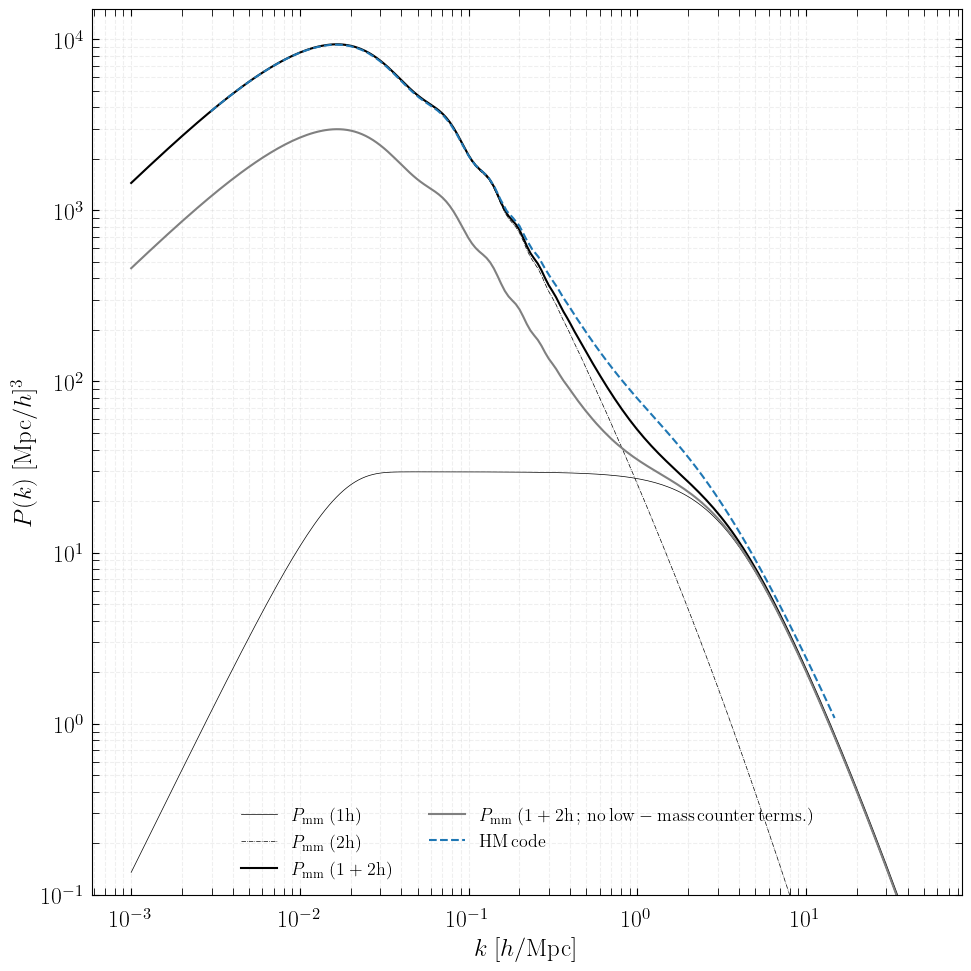

In [32]:
k_arr = np.geomspace(2e-3,1e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,10))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,1.5e4)


ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = r'$P_\mathrm{mm}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = r'$P_\mathrm{mm}$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = r'$P_\mathrm{mm}$ $\mathrm{(1+2h)}$',c='k',ls='-')

ax.plot(pk_at_z_hm_noct['k'],np.asarray(pk_at_z_hm_noct['2h'])+np.asarray(pk_at_z_hm_noct['1h']),label = r'$P_\mathrm{mm}$ $\mathrm{(1+2h\,;\,no\,low-mass\,counter\,terms.)}$',c='grey',ls='-')


ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label=r'$\mathrm{HM\,code}$',ls='--')


ax.legend(fontsize=11,ncol=1,frameon=False)




ax.legend(fontsize=13,ncol=2,frameon=False)
fig.tight_layout()


